In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("facebook-fact-check.csv")

In [5]:
# Fill NaN values with 0 for engagement metrics
df[['share_count', 'reaction_count', 'comment_count']] = df[['share_count', 'reaction_count', 'comment_count']].fillna(0)

In [29]:
# Create a column for total engagement
df['total_engagement'] = df['share_count'] + df['reaction_count'] + df['comment_count']
print(df)

            post_id post_type              rating  share_count  \
0  1035057923259100     video  no factual content          146   
1  1035269309904628      link         mostly true            1   
2  1035322636565962      link         mostly true           35   
3  1035558749875684     video  no factual content            3   

   reaction_count  comment_count  total_engagement  
0              15              0               161  
1              33             34                68  
2             170             86               291  
3               9              3                15  


In [31]:
engagement_by_type = df.groupby("post_type")["total_engagement"].mean()
print(engagement_by_type)

post_type
link     179.5
video     88.0
Name: total_engagement, dtype: float64


In [33]:
misinfo_shares = df.groupby("rating")["share_count"].mean().reset_index()
print(misinfo_shares)

               rating  share_count
0         mostly true         18.0
1  no factual content         74.5


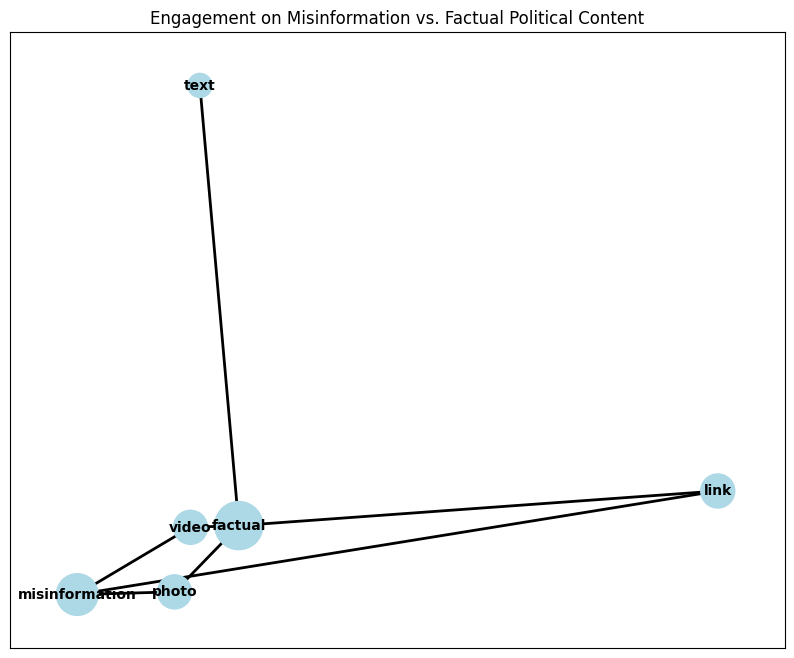

In [8]:
# Create Network Graph
G = nx.Graph()

# Define categories
categories = ['misinformation', 'factual']

# Classify posts as misinformation or factual based on 'Rating'
def classify_rating(rating):
    if rating in ['no factual content']:
        return 'misinformation'
    else:
        return 'factual'

df['content_type'] = df['Rating'].apply(classify_rating)

# Add nodes (Post Type and Content Type)
for _, row in df.iterrows():
    post_type = row['Post Type']
    content_type = row['content_type']
    
    # Add nodes
    G.add_node(post_type, type='Post Type')
    G.add_node(content_type, type='Content Type')
    
    # Add edges with engagement as weight
    G.add_edge(post_type, content_type, weight=row['total_engagement'])

# Plotting the Graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Draw the nodes with size based on engagement
node_sizes = [G.degree(node) * 300 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Engagement on Misinformation vs. Factual Political Content")
plt.show()

NameError: name 'nx' is not defined

In [23]:
G.add_node("Factual", size=5000, color='blue')            
G.add_node("Misinformation", size=5000, color='red')

In [26]:
for i, row in df.iterrows():
    # Calculate total engagement (shares + reactions + comments)
    engagement = row['share_count'] + row['reaction_count'] + row['comment_count']
    if row['rating'] == 'no factual content':
        category = "Misinformation"
        color = 'red'
    else:
        category = "Factual"
        color = 'blue'

In [ ]:
if row['rating'] == 'no factual content':
        category = "Misinformation"
        color = 'red'
else:
        category = "Factual"
        color = 'blue'

In [25]:
node_name = str(row['account_id']) + "_" + row['post_id'] 
G.add_node(node_name, size=engagement * 10, color=color)
G.add_edge(category, node_name, weight=engagement)

KeyError: 'account_id'

In [ ]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)  # Layout for better spacing

In [ ]:
sizes = [G.nodes[node]['size'] for node in G.nodes()]
colors = [G.nodes[node]['color'] for node in G.nodes()]

In [ ]:
nx.draw(G, pos, with_labels=False, node_size=sizes, node_color=colors, edge_color='gray', alpha=0.7)

In [ ]:
for node, (x, y) in pos.items():
    if node in ["Factual", "Misinformation"]:
        plt.text(x, y, node, fontsize=16, fontweight='bold', ha='center', va='center')

In [ ]:
for node, (x, y) in pos.items():
    if node not in ["Factual", "Misinformation"]:
        plt.text(x, y, node, fontsize=8, ha='center', va='center')

In [22]:



plt.title('Engagement on Misinformation vs. Factual Political Content by Account ID')
plt.show()

KeyError: 'account_id'